In [6]:
!pip install numpy pandas matplotlib scikit-learn tensorflow opencv-python

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [8]:
def load_and_preprocess_images(train_folder, test_folder, img_size=(150, 150)):
    def load_from_folder(folder, label):
        images = []
        labels = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0  # Normalize the image
                images.append(img)
                labels.append(label)
        return images, labels
    
    train_images, train_labels = load_from_folder(train_folder, 1)
    test_images, test_labels = load_from_folder(test_folder, 0)
    
    return np.array(train_images), np.array(train_labels), np.array(test_images), np.array(test_labels)


In [9]:
# Replace with your actual data paths
xray_train_folder_covid = 'Dataset/XRayTrain/COVID'
xray_train_folder_non_covid = 'Dataset/XRayTrain/Non-COVID'
xray_test_folder_covid = 'Dataset/X-Ray Test/COVID'
xray_test_folder_non_covid = 'Dataset/X-Ray Test/Non-COVID'

ct_train_folder_covid = 'Dataset/CT-Scan Train/COVID'
ct_train_folder_non_covid = 'Dataset/CT-Scan Train/Non-COVID'
ct_test_folder_covid = 'Dataset/CT-Scan Test/COVID'
ct_test_folder_non_covid = 'Dataset/CT-Scan Test/Non-COVID'

In [10]:
# Load and preprocess data for X-ray
xray_train_images_covid, xray_train_labels_covid, xray_test_images_covid, xray_test_labels_covid = load_and_preprocess_images(
    xray_train_folder_covid, xray_test_folder_covid
)
xray_train_images_non_covid, xray_train_labels_non_covid, xray_test_images_non_covid, xray_test_labels_non_covid = load_and_preprocess_images(
    xray_train_folder_non_covid, xray_test_folder_non_covid
)
# Combine training and testing datasets for X-ray
xray_train_images = np.concatenate((xray_train_images_covid, xray_train_images_non_covid))
xray_train_labels = np.concatenate((np.ones(len(xray_train_images_covid)), np.zeros(len(xray_train_images_non_covid))))
xray_test_images = np.concatenate((xray_test_images_covid, xray_test_images_non_covid))
xray_test_labels = np.concatenate((np.ones(len(xray_test_images_covid)), np.zeros(len(xray_test_images_non_covid))))

In [11]:

# Load and preprocess data for CT scan
ct_train_images_covid, ct_train_labels_covid, ct_test_images_covid, ct_test_labels_covid = load_and_preprocess_images(
    ct_train_folder_covid, ct_test_folder_covid
)
ct_train_images_non_covid, ct_train_labels_non_covid, ct_test_images_non_covid, ct_test_labels_non_covid = load_and_preprocess_images(
    ct_train_folder_non_covid, ct_test_folder_non_covid
)

# Combine training and testing datasets for CT scan
ct_train_images = np.concatenate((ct_train_images_covid, ct_train_images_non_covid))
ct_train_labels = np.concatenate((np.ones(len(ct_train_images_covid)), np.zeros(len(ct_train_images_non_covid))))
ct_test_images = np.concatenate((ct_test_images_covid, ct_test_images_non_covid))
ct_test_labels = np.concatenate((np.ones(len(ct_test_images_covid)), np.zeros(len(ct_test_images_non_covid))))


In [12]:
import os

def list_image_files(folder):
    try:
        files = os.listdir(folder)
        images = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        if images:
            print(f"Found {len(images)} images in {folder}:")
            for img in images[:10]:  # Show the first 10 images
                print(img)
        else:
            print(f"No images found in {folder}.")
    except FileNotFoundError:
        print(f"Folder not found: {folder}")


# Replace with your actual data paths
xray_train_folder_covid = 'Dataset/XRayTrain/COVID'
xray_train_folder_non_covid = 'Dataset/XRayTrain/Non-COVID'
xray_test_folder_covid = 'Dataset/X-Ray Test/COVID'
xray_test_folder_non_covid = 'Dataset/X-Ray Test/Non-COVID'

ct_train_folder_covid = 'Dataset/CT-Scan Train/COVID'
ct_train_folder_non_covid = 'Dataset/CT-Scan Train/Non-COVID'
ct_test_folder_covid = 'Dataset/CT-Scan Test/COVID'
ct_test_folder_non_covid = 'Dataset/CT-Scan Test/Non-COVID'

# List image files in each directory
list_image_files(xray_train_folder_covid)
list_image_files(xray_train_folder_non_covid )
list_image_files(xray_test_folder_covid)
list_image_files(xray_test_folder_non_covid )


list_image_files(ct_train_folder_covid)
list_image_files( ct_train_folder_non_covid)
list_image_files(ct_test_folder_covid)
list_image_files( ct_test_folder_non_covid)




Found 3051 images in Dataset/XRayTrain/COVID:
000001-12 - Copy.jpg
000001-12.jpg
000001-17.jpg
000001-19.jpg
000001-2 - Copy.jpg
000001-2 - Copy.png
000001-2.jpg
000001-2.png
000001-24.jpg
000001-27.jpg
Found 2097 images in Dataset/XRayTrain/Non-COVID:
acute-respiratory-distress-syndrome-ards-1.jpg
acute-respiratory-distress-syndrome-ards.jpg
anterior.png
ards-secondary-to-tiger-snake-bite.png
aspiration-pneumonia-5-day0.jpg
aspiration-pneumonia-5-day10.jpg
aspiration-pneumonia-5-day27.jpg
aspiration-pneumonia-5-day3.jpg
cavitating-pneumonia-4-day0-PA.jpg
cavitating-pneumonia-4-day28-PA.png
Found 760 images in Dataset/X-Ray Test/COVID:
person1528_virus_2662.jpeg
person1529_virus_2663.jpeg
person152_virus_303.jpeg
person1530_virus_2664.jpeg
person1531_virus_2666.jpeg
person1534_virus_2670.jpeg
person1535_virus_2672.jpeg
person1537_virus_2674.jpeg
person1539_virus_2678.jpeg
person1541_virus_2681.jpeg
Found 525 images in Dataset/X-Ray Test/Non-COVID:
Non-COVID-19 (484).jpeg
Non-COVID-19 (

Loading and verifying images in Dataset/XRayTrain/COVID...


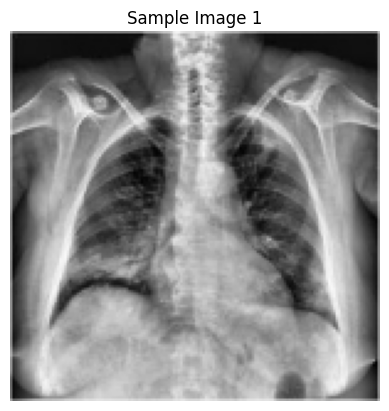

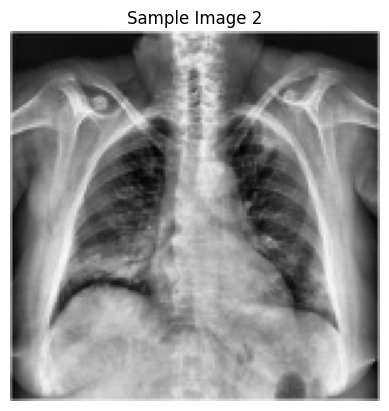

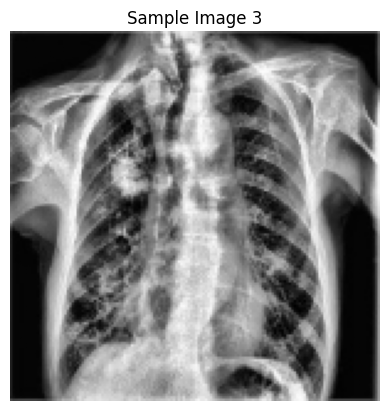

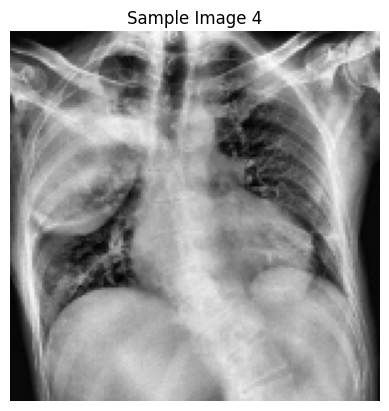

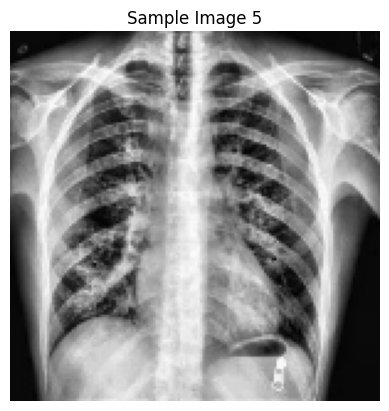

Displayed 5 sample images.
Loading and verifying images in Dataset/XRayTrain/Non-COVID...


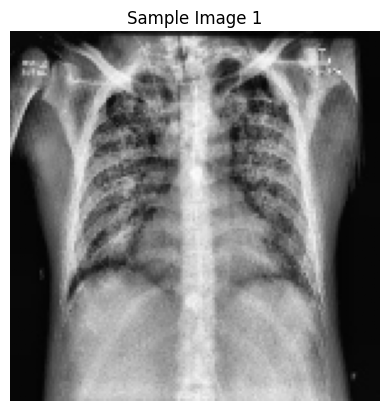

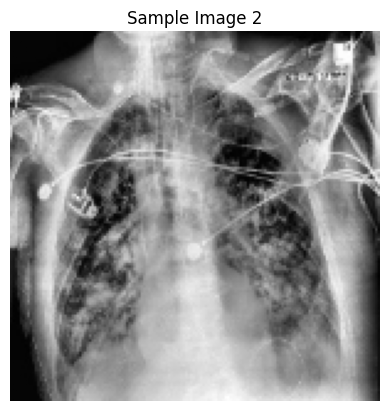

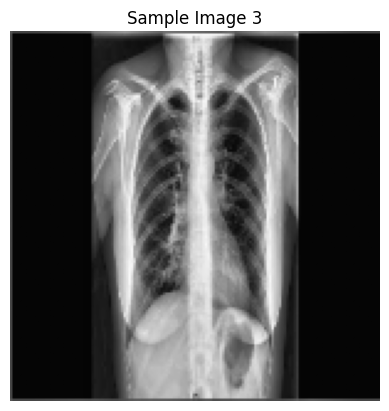

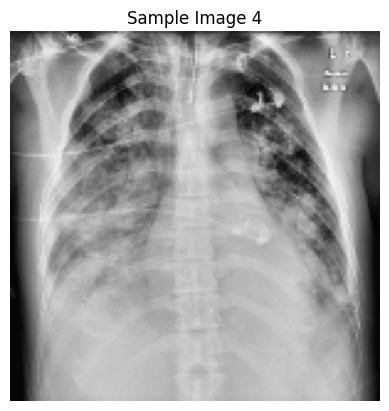

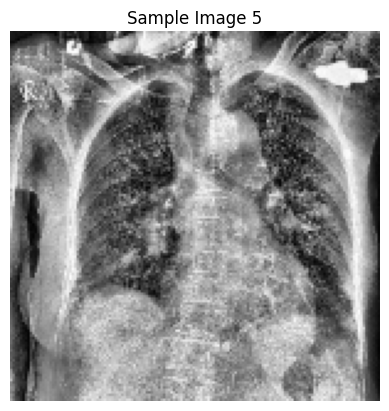

Displayed 5 sample images.
Loading and verifying images in Dataset/X-Ray Test/COVID...


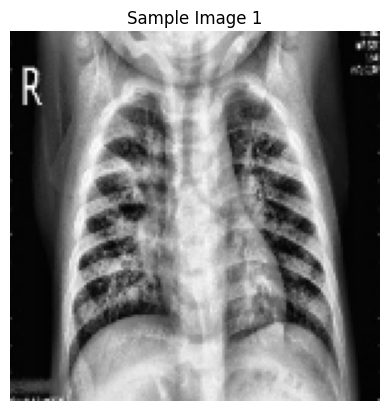

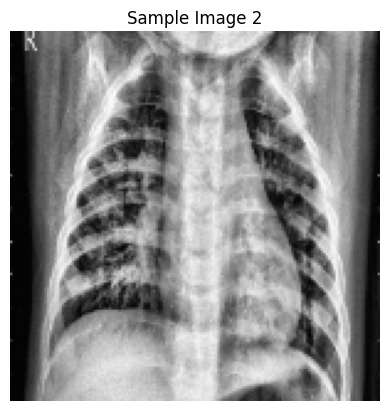

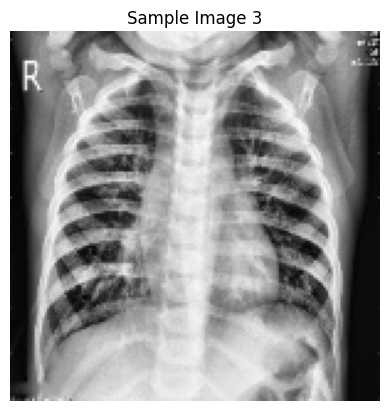

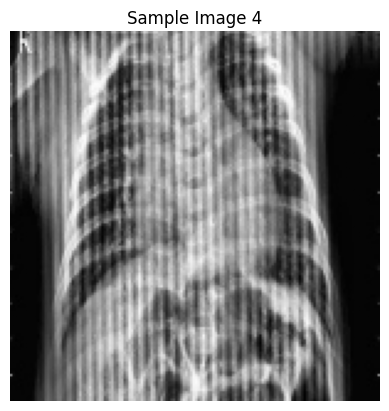

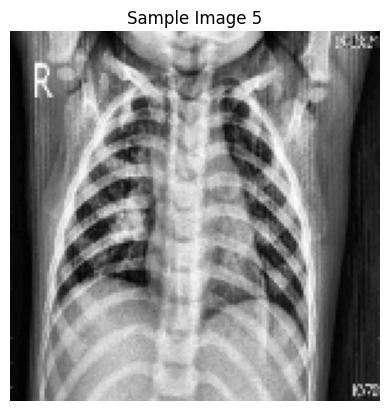

Displayed 5 sample images.
Loading and verifying images in Dataset/X-Ray Test/Non-COVID...


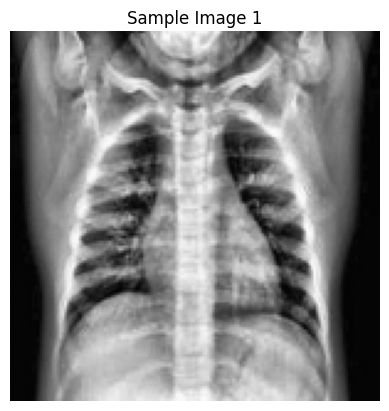

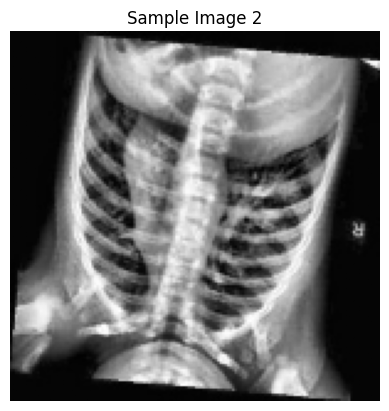

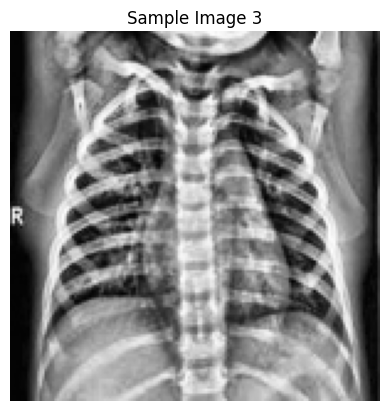

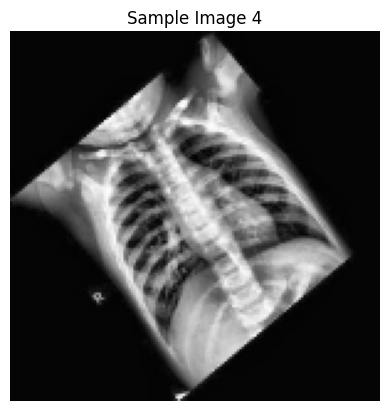

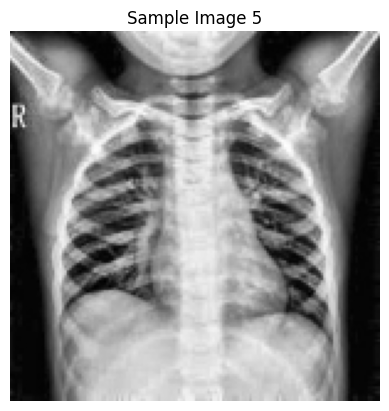

Displayed 5 sample images.
Loading and verifying images in Dataset/CT-Scan Train/COVID...


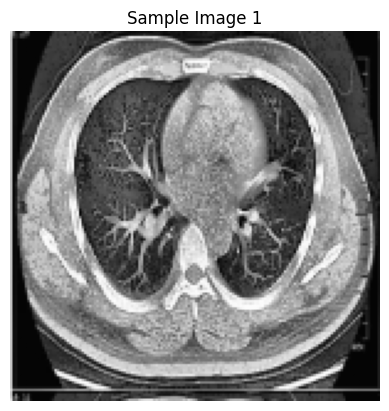

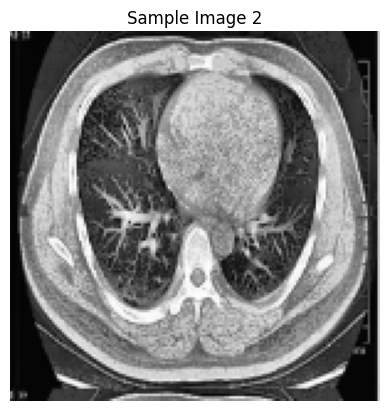

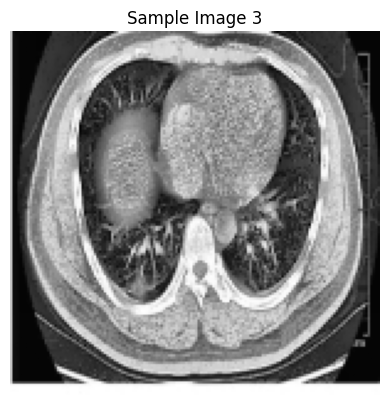

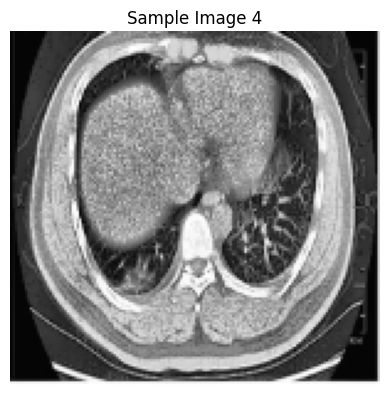

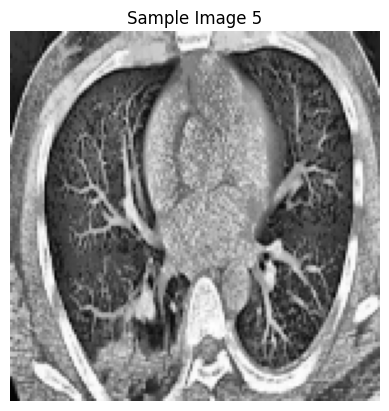

Displayed 5 sample images.
Loading and verifying images in Dataset/CT-Scan Train/Non-COVID...


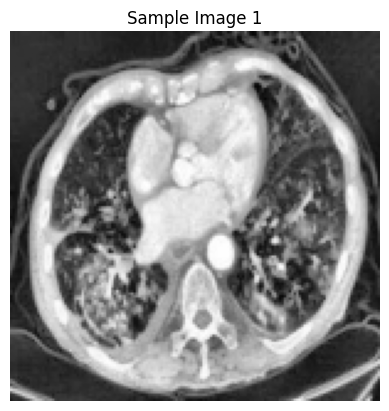

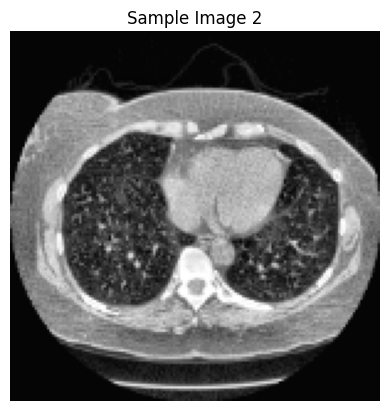

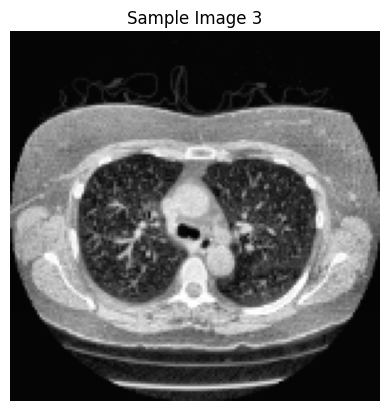

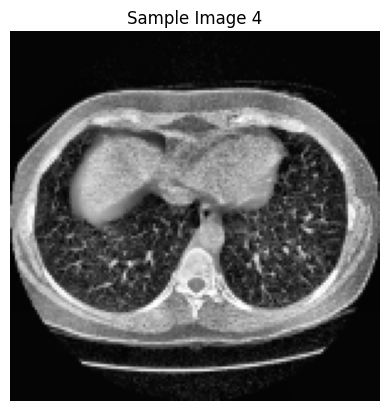

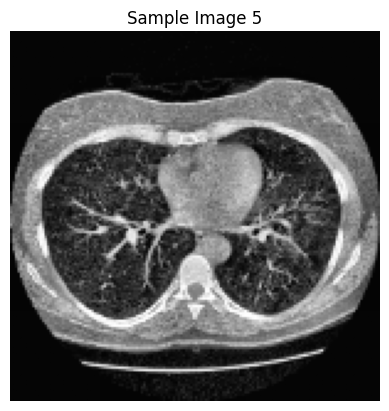

Displayed 5 sample images.
Loading and verifying images in Dataset/CT-Scan Test/COVID...


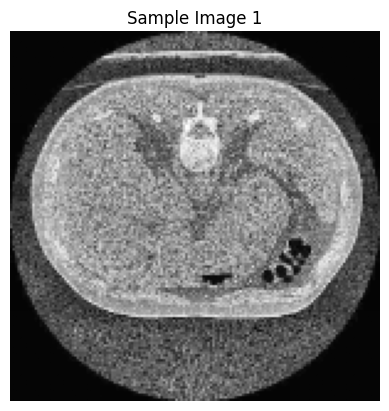

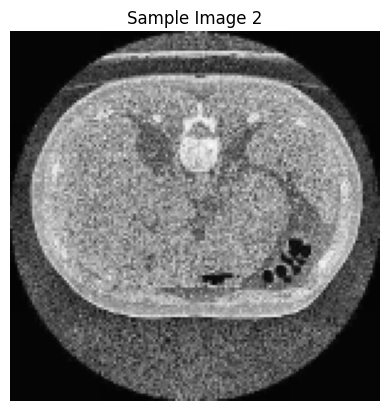

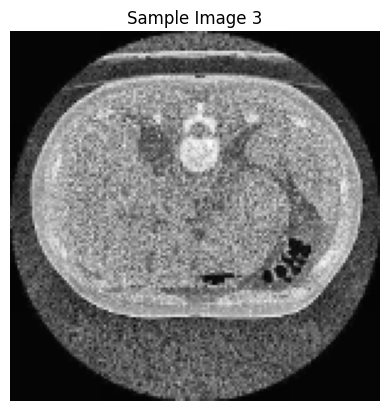

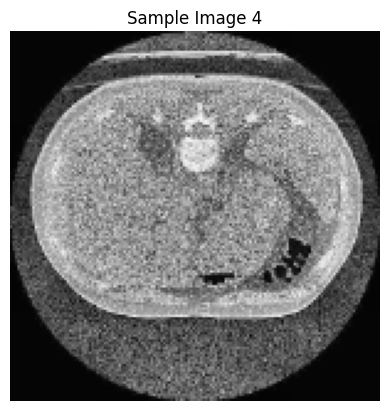

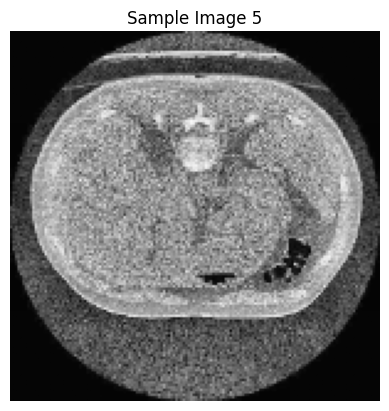

Displayed 5 sample images.
Loading and verifying images in Dataset/CT-Scan Test/Non-COVID...


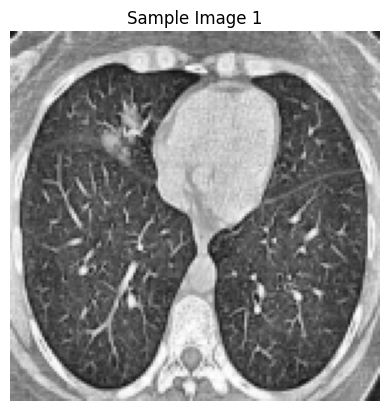

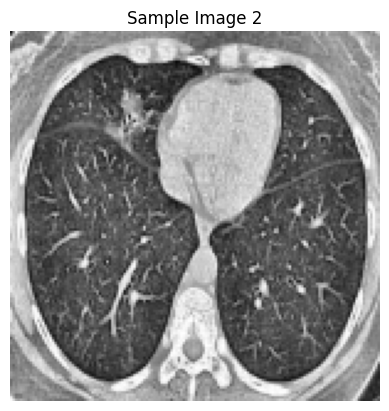

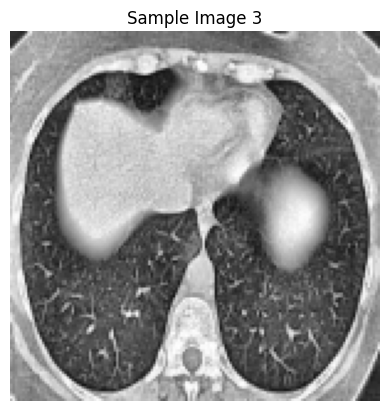

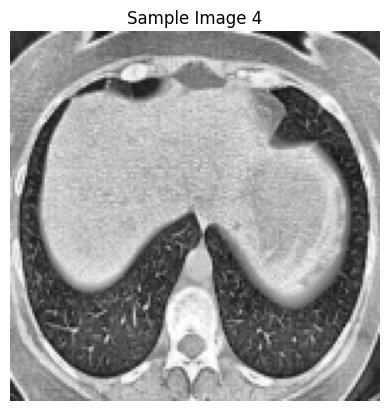

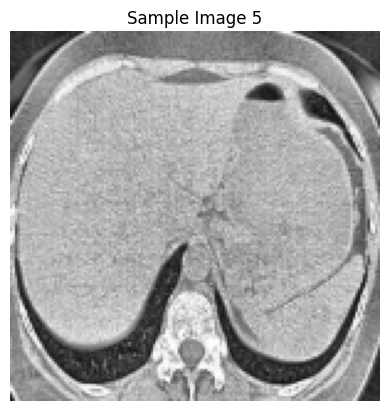

Displayed 5 sample images.


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, img_size)
        img = img.astype('float32') / 255.0  # Normalize the image
    return img

def load_images_from_folder(folder, img_size=(150, 150)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_image(img_path, img_size)
        if img is not None:
            images.append(img)
    return np.array(images)

def verify_images(images, num_samples=5):
    if len(images) == 0:
        print("No images to display.")
        return
    for i in range(min(num_samples, len(images))):
        plt.imshow(images[i])
        plt.title(f"Sample Image {i+1}")
        plt.axis('off')
        plt.show()
    print(f"Displayed {min(num_samples, len(images))} sample images.")

# Load and verify images from each folder
def check_images():
    # Define paths
    folders = [
        xray_train_folder_covid, xray_train_folder_non_covid,
        xray_test_folder_covid, xray_test_folder_non_covid,
        ct_train_folder_covid, ct_train_folder_non_covid,
        ct_test_folder_covid, ct_test_folder_non_covid
    ]
    
    for folder in folders:
        print(f"Loading and verifying images in {folder}...")
        images = load_images_from_folder(folder)
        verify_images(images)

check_images()


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

def create_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    return model


In [15]:

from tensorflow.keras.callbacks import EarlyStopping

def train_model(model, train_images, train_labels, val_images, val_labels, epochs=30):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        train_images, train_labels,
        epochs=epochs,
        validation_data=(val_images, val_labels),
        callbacks=[early_stopping]
    )
    return history



In [16]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score

def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predicted_classes = (predictions > 0.5).astype(int).flatten()
    
    accuracy = accuracy_score(test_labels, predicted_classes)
    auc = roc_auc_score(test_labels, predictions)
    precision = precision_score(test_labels, predicted_classes)
    recall = recall_score(test_labels, predicted_classes)
    report = classification_report(test_labels, predicted_classes)
    
    return accuracy, auc, precision, recall, report



In [17]:
# Create models
xray_model = create_cnn_model()
ct_model = create_cnn_model()

In [18]:
xray_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
ct_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:

# Train X-ray model
print("Training X-ray model...")
try:
    xray_history = train_model(xray_model, xray_train_images, xray_train_labels, xray_test_images, xray_test_labels)
except Exception as e:
    print(f"An error occurred during X-ray model training: {e}")

# Train CT scan model
print("Training CT scan model...")
try:
    ct_history = train_model(ct_model, ct_train_images, ct_train_labels, ct_test_images, ct_test_labels)
except Exception as e:
    print(f"An error occurred during CT scan model training: {e}")

# Evaluate X-ray model
print("Evaluating X-ray model...")
try:
    xray_accuracy, xray_auc, xray_precision, xray_recall, xray_report = evaluate_model(xray_model, xray_test_images, xray_test_labels)
    print(f'Chest X-ray Model Accuracy: {xray_accuracy}')
    print(f'Chest X-ray Model AUC: {xray_auc}')
    print(f'Chest X-ray Model Precision: {xray_precision}')
    print(f'Chest X-ray Model Recall: {xray_recall}')
    print('Chest X-ray Classification Report:')
    print(xray_report)
except Exception as e:
    print(f"An error occurred during X-ray model evaluation: {e}")

# Evaluate CT scan model
print("Evaluating CT scan model...")
try:
    ct_accuracy, ct_auc, ct_precision, ct_recall, ct_report = evaluate_model(ct_model, ct_test_images, ct_test_labels)
    print(f'CT Scan Model Accuracy: {ct_accuracy}')
    print(f'CT Scan Model AUC: {ct_auc}')
    print(f'CT Scan Model Precision: {ct_precision}')
    print(f'CT Scan Model Recall: {ct_recall}')
    print('CT Scan Classification Report:')
    print(ct_report)
except Exception as e:
    print(f"An error occurred during CT scan model evaluation: {e}")



Training X-ray model...
Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 82s 478ms/step - AUC: 0.7109 - Precision: 0.7020 - Recall: 0.7838 - accuracy: 0.6722 - loss: 0.6011 - val_AUC: 0.7761 - val_Precision: 0.7747 - val_Recall: 0.5158 - val_accuracy: 0.6249 - val_loss: 0.6552
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 466ms/step - AUC: 0.9111 - Precision: 0.8502 - Recall: 0.8865 - accuracy: 0.8403 - loss: 0.3685 - val_AUC: 0.8052 - val_Precision: 0.7726 - val_Recall: 0.8895 - val_accuracy: 0.7798 - val_loss: 0.4982
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 73s 452ms/step - AUC: 0.9295 - Precision: 0.8571 - Recall: 0.8959 - accuracy: 0.8514 - loss: 0.3254 - val_AUC: 0.8035 - val_Precision: 0.7945 - val_Recall: 0.6461 - val_accuracy: 0.6918 - val_loss: 0.6048
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 464ms/step - AUC: 0.9532 - Precision: 0.8905 - Recall: 0.9138 - accuracy: 0.8848 - loss: 0.2737 - val_AUC: 0.8504 - val_Precision: 0.8148 - val_Recall: 0.8105 - val_accuracy: 0.7790 - val_loss: 0.4

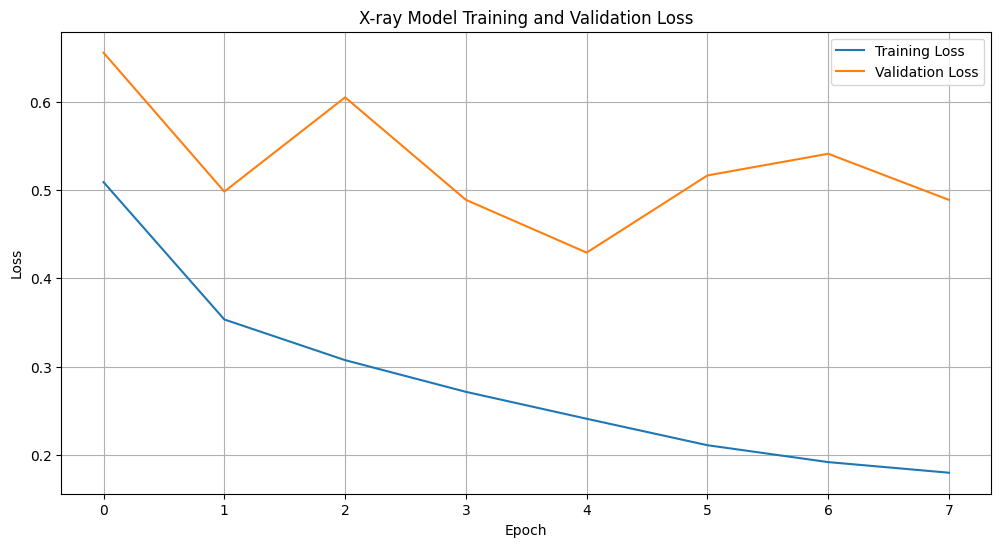

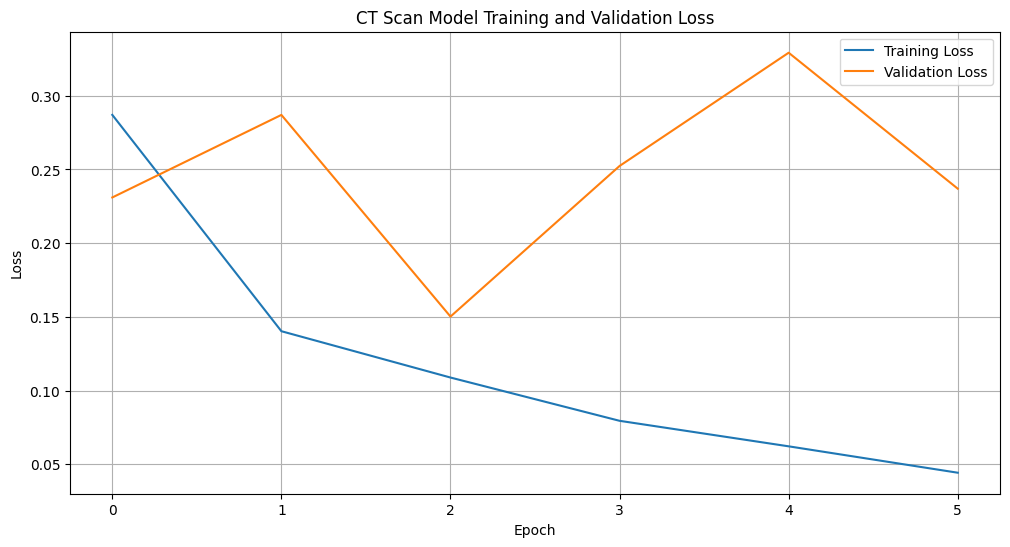

In [47]:
import matplotlib.pyplot as plt

def plot_training_validation_loss(history, title='Training and Validation Loss'):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for X-ray and CT models
plot_training_validation_loss(xray_history, title='X-ray Model Training and Validation Loss')
plot_training_validation_loss(ct_history, title='CT Scan Model Training and Validation Loss')


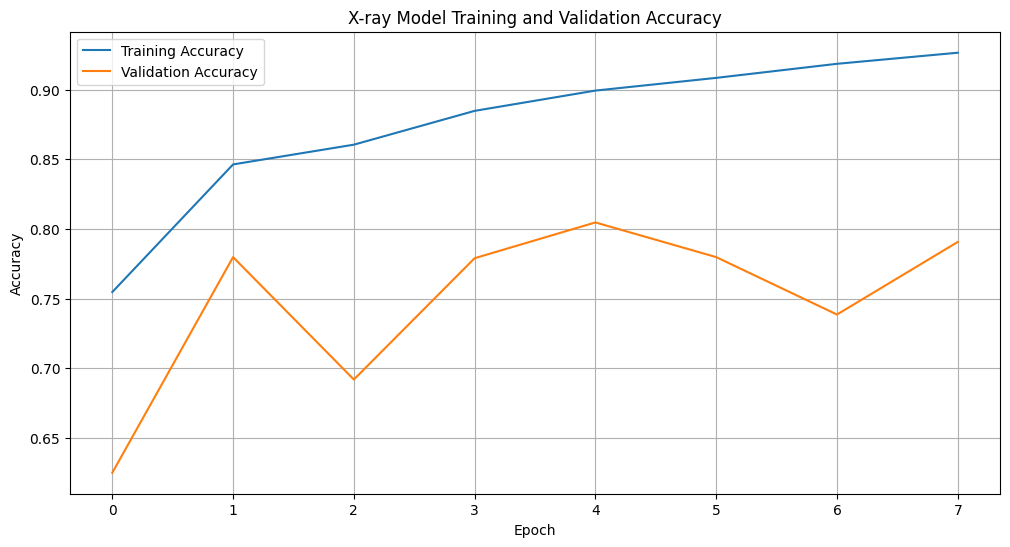

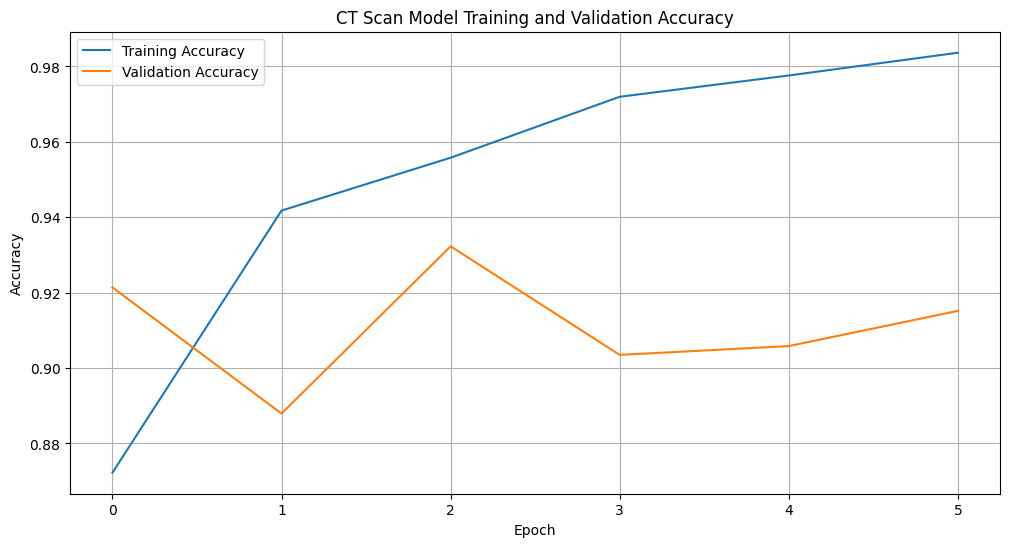

In [22]:
def plot_training_validation_accuracy(history, title='Training and Validation Accuracy'):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for X-ray and CT models
plot_training_validation_accuracy(xray_history, title='X-ray Model Training and Validation Accuracy')
plot_training_validation_accuracy(ct_history, title='CT Scan Model Training and Validation Accuracy')


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step


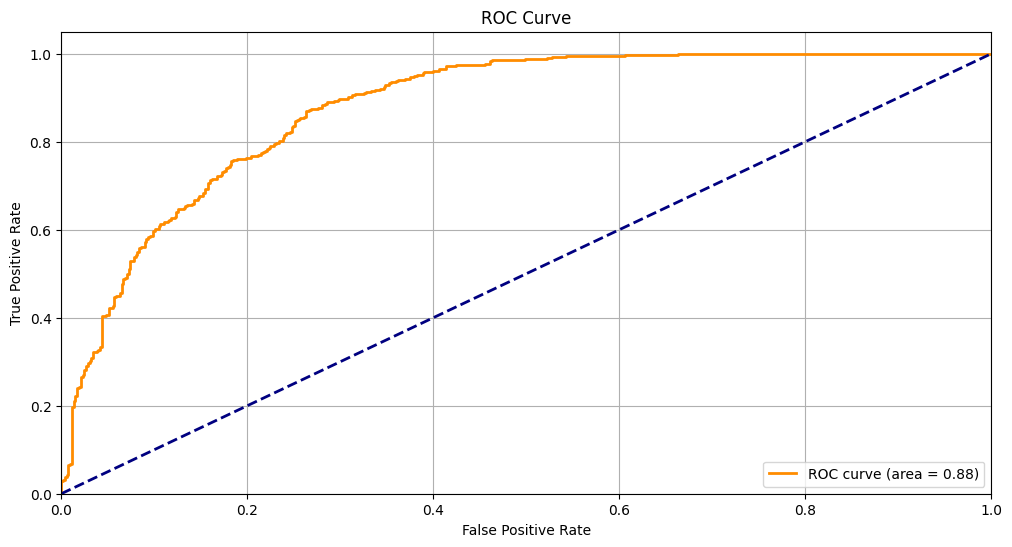

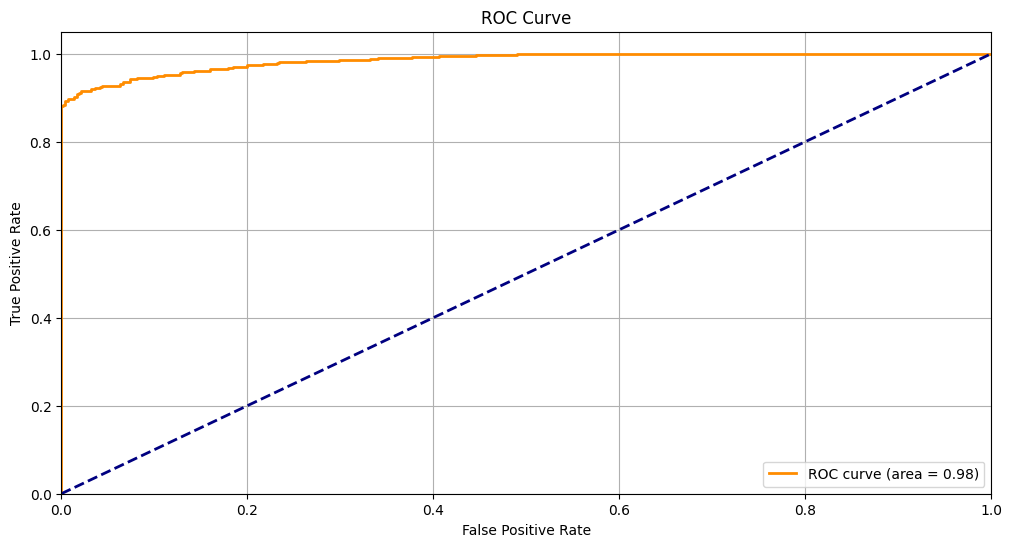

In [24]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(test_labels, predictions, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(test_labels, predictions)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(12, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# ROC for X-ray and CT models
xray_predictions = xray_model.predict(xray_test_images)
ct_predictions = ct_model.predict(ct_test_images)

plot_roc_curve(xray_test_labels, xray_predictions)
plot_roc_curve(ct_test_labels, ct_predictions)


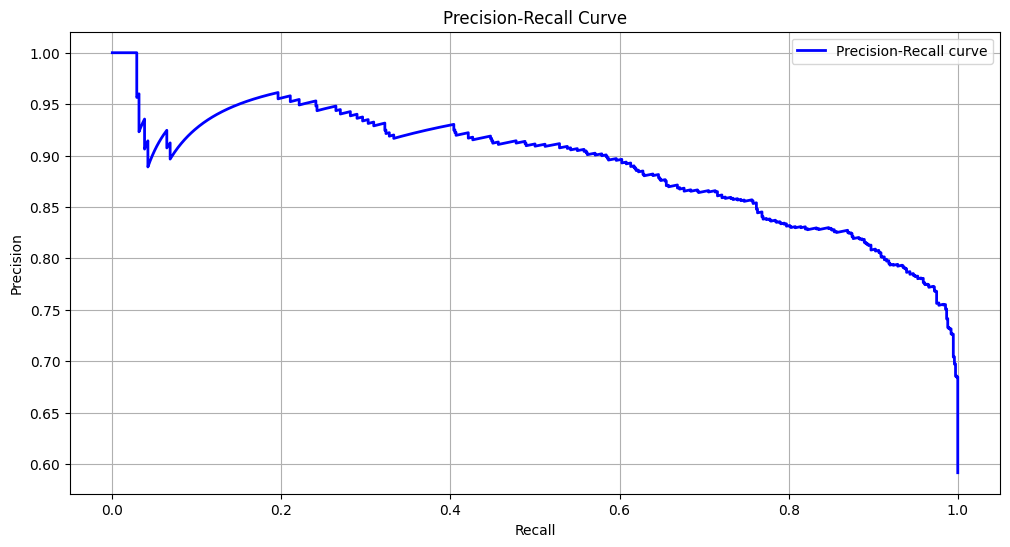

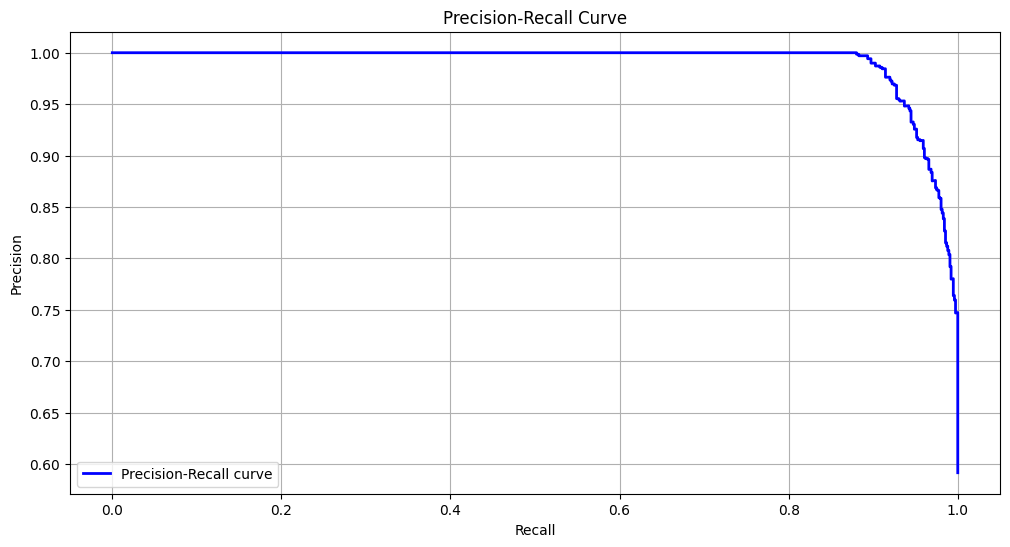

In [25]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(test_labels, predictions, title='Precision-Recall Curve'):
    precision, recall, _ = precision_recall_curve(test_labels, predictions)
    
    plt.figure(figsize=(12, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Precision-Recall for X-ray and CT models
plot_precision_recall_curve(xray_test_labels, xray_predictions)
plot_precision_recall_curve(ct_test_labels, ct_predictions)


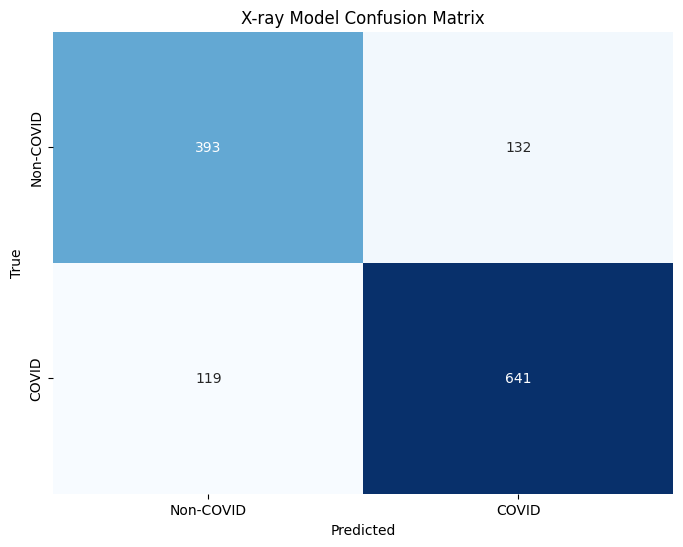

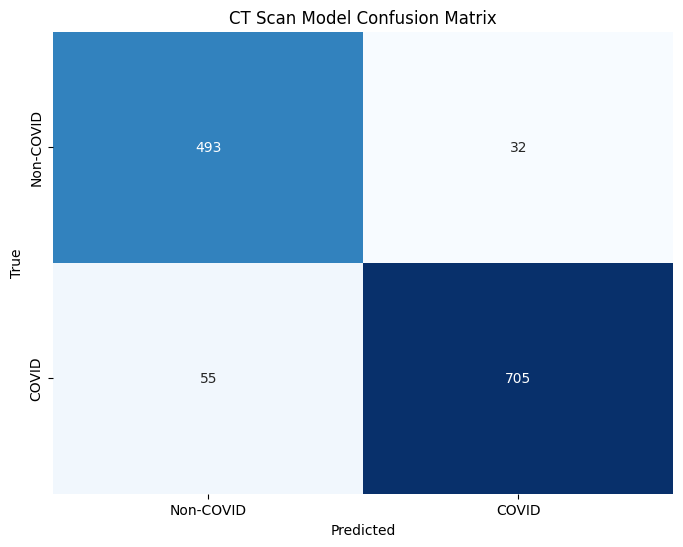

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, predicted_classes, title='Confusion Matrix'):
    cm = confusion_matrix(test_labels, predicted_classes)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Confusion Matrix for X-ray and CT models
xray_pred_classes = (xray_predictions > 0.5).astype(int).flatten()
ct_pred_classes = (ct_predictions > 0.5).astype(int).flatten()

plot_confusion_matrix(xray_test_labels, xray_pred_classes, title='X-ray Model Confusion Matrix')
plot_confusion_matrix(ct_test_labels, ct_pred_classes, title='CT Scan Model Confusion Matrix')


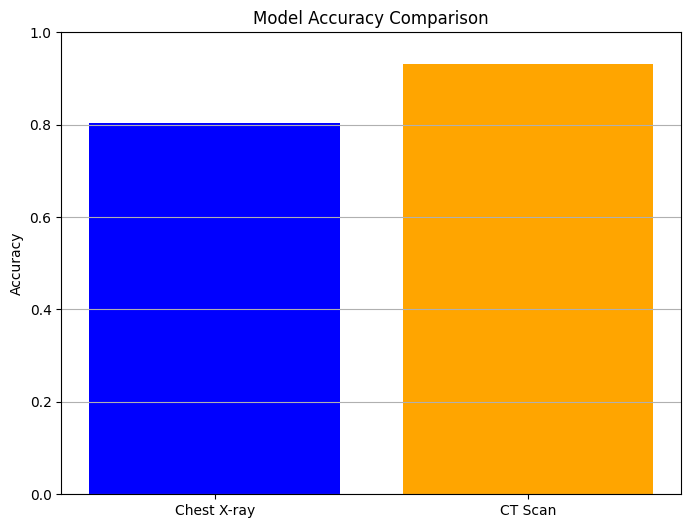

In [27]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(xray_accuracy, ct_accuracy, title='Accuracy Comparison'):
    models = ['Chest X-ray', 'CT Scan']
    accuracies = [xray_accuracy, ct_accuracy]
    
    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies, color=['blue', 'orange'])
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.ylim([0, 1])
    plt.grid(axis='y')
    plt.show()

# Use previously computed accuracies
plot_accuracy_comparison(xray_accuracy, ct_accuracy, title='Model Accuracy Comparison')


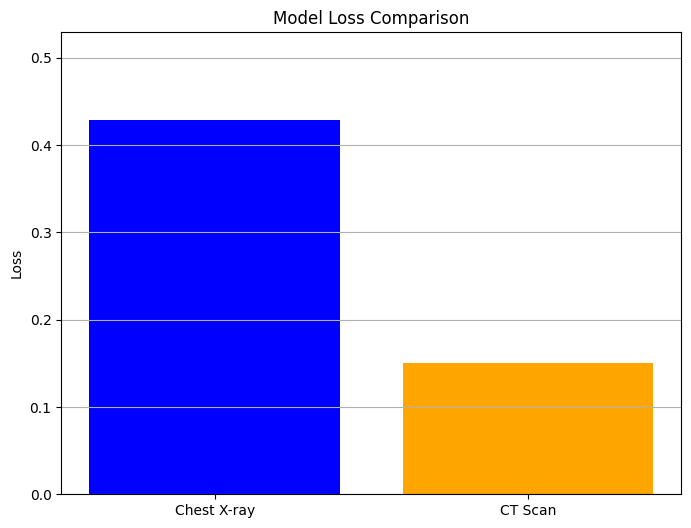

In [28]:
def plot_loss_comparison(xray_history, ct_history, title='Loss Comparison'):
    xray_loss = min(xray_history.history['val_loss'])
    ct_loss = min(ct_history.history['val_loss'])
    
    models = ['Chest X-ray', 'CT Scan']
    losses = [xray_loss, ct_loss]
    
    plt.figure(figsize=(8, 6))
    plt.bar(models, losses, color=['blue', 'orange'])
    plt.ylabel('Loss')
    plt.title(title)
    plt.ylim([0, max(losses) + 0.1])
    plt.grid(axis='y')
    plt.show()

# Plot loss comparison
plot_loss_comparison(xray_history, ct_history, title='Model Loss Comparison')


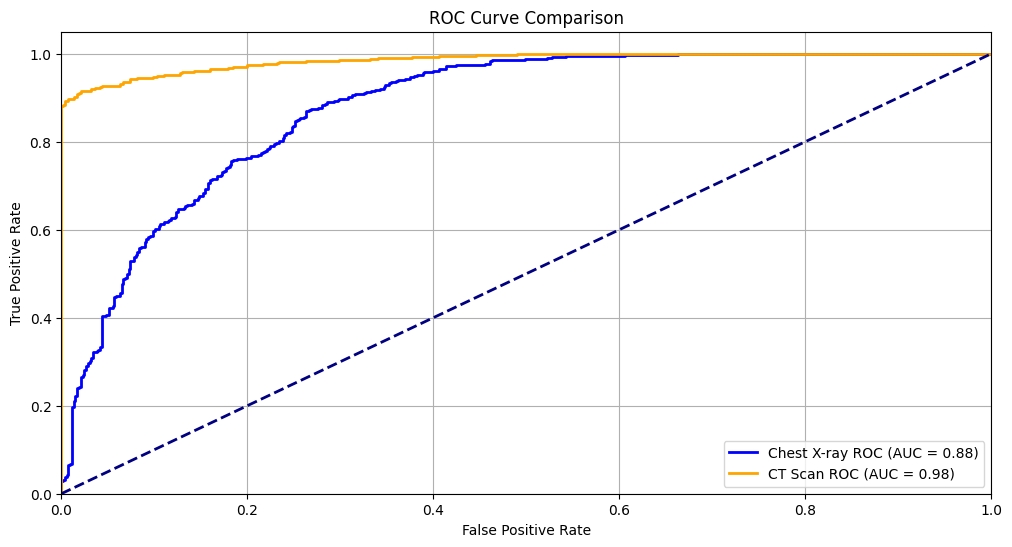

In [50]:
def plot_roc_curve_comparison(xray_test_labels, xray_predictions, ct_test_labels, ct_predictions, title='ROC Curve Comparison'):
    from sklearn.metrics import roc_curve, auc
    
    xray_fpr, xray_tpr, _ = roc_curve(xray_test_labels, xray_predictions)
    ct_fpr, ct_tpr, _ = roc_curve(ct_test_labels, ct_predictions)
    
    xray_auc = auc(xray_fpr, xray_tpr)
    ct_auc = auc(ct_fpr, ct_tpr)
    
    plt.figure(figsize=(12, 6))
    plt.plot(xray_fpr, xray_tpr, color='blue', lw=2, label=f'Chest X-ray ROC (AUC = {xray_auc:.2f})')
    plt.plot(ct_fpr, ct_tpr, color='orange', lw=2, label=f'CT Scan ROC (AUC = {ct_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# ROC Curve Comparison
plot_roc_curve_comparison(xray_test_labels, xray_predictions, ct_test_labels, ct_predictions)


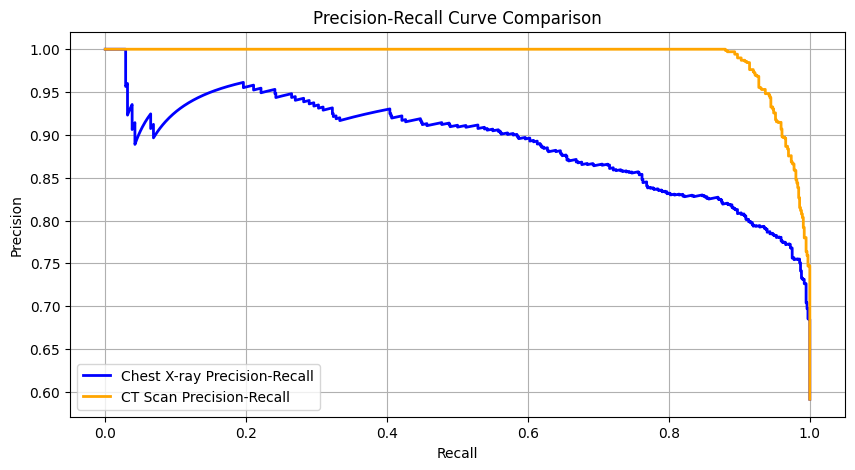

In [49]:
def plot_precision_recall_comparison(xray_test_labels, xray_predictions, ct_test_labels, ct_predictions, title='Precision-Recall Curve Comparison'):
    from sklearn.metrics import precision_recall_curve
    
    xray_precision, xray_recall, _ = precision_recall_curve(xray_test_labels, xray_predictions)
    ct_precision, ct_recall, _ = precision_recall_curve(ct_test_labels, ct_predictions)
    
    plt.figure(figsize=(10, 5))
    plt.plot(xray_recall, xray_precision, color='blue', lw=2, label='Chest X-ray Precision-Recall')
    plt.plot(ct_recall, ct_precision, color='orange', lw=2, label='CT Scan Precision-Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Precision-Recall Curve Comparison
plot_precision_recall_comparison(xray_test_labels, xray_predictions, ct_test_labels, ct_predictions)


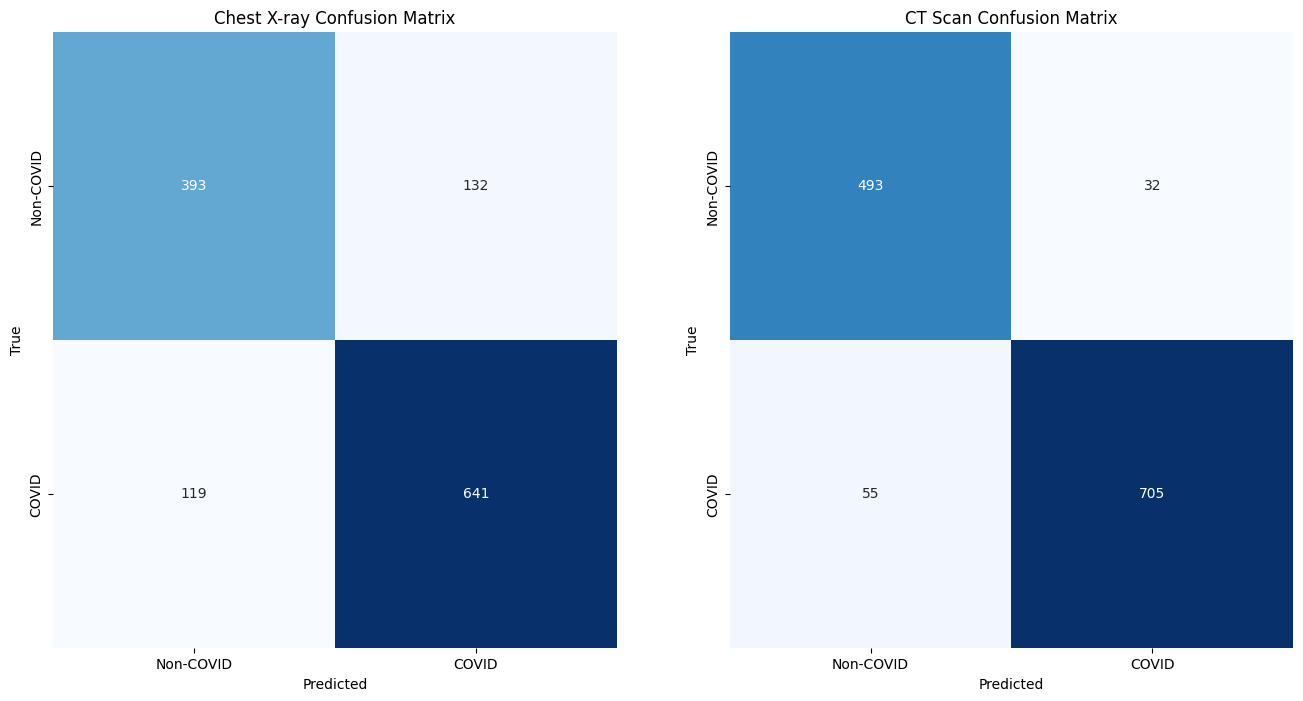

In [31]:
def plot_confusion_matrix_comparison(xray_test_labels, xray_pred_classes, ct_test_labels, ct_pred_classes, title='Confusion Matrix Comparison'):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    xray_cm = confusion_matrix(xray_test_labels, xray_pred_classes)
    ct_cm = confusion_matrix(ct_test_labels, ct_pred_classes)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    sns.heatmap(xray_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0], 
                xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title('Chest X-ray Confusion Matrix')
    
    sns.heatmap(ct_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1], 
                xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    axes[1].set_title('CT Scan Confusion Matrix')
    
    plt.show()

# Confusion Matrix Comparison
xray_pred_classes = (xray_predictions > 0.5).astype(int).flatten()
ct_pred_classes = (ct_predictions > 0.5).astype(int).flatten()

plot_confusion_matrix_comparison(xray_test_labels, xray_pred_classes, ct_test_labels, ct_pred_classes)


In [32]:
# Save the X-ray model using the native Keras format
xray_model.save('xray_model.keras')

# Save the CT scan model using the native Keras format
ct_model.save('ct_model.keras')


In [33]:
from tensorflow.keras.models import load_model

# Load the X-ray model
xray_model = load_model('xray_model.keras')

# Load the CT scan model
ct_model = load_model('ct_model.keras')


In [34]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Function to create and compile the model architecture
def create_cnn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(150, 150, 3)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to load and preprocess a single image
def preprocess_single_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {file_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify a single image using a given model
def classify_image(model, image_path, img_size=(150, 150), threshold=0.5):
    image = preprocess_single_image(image_path, img_size)
    prediction = model.predict(image)[0][0]
    if prediction > threshold:
        return "COVID-19", prediction
    else:
        return "Non-COVID-19", prediction

# Save the X-ray and CT scan models using the native Keras format
def save_models():
    xray_model = create_cnn_model()
    ct_model = create_cnn_model()

    # Dummy training code to initialize weights (Replace this with actual training)
    # Example:
    # xray_model.fit(xray_train_data, xray_train_labels, epochs=1)
    # ct_model.fit(ct_train_data, ct_train_labels, epochs=1)

    # Save the models
    xray_model.save('xray_model.keras')
    ct_model.save('ct_model.keras')

# Load the trained models from the native Keras format
def load_models():
    xray_model = load_model('xray_model.keras')
    ct_model = load_model('ct_model.keras')
    return xray_model, ct_model

def main():
    # Save models (typically done only once, not in the main function)
    # Uncomment the following line if you need to save models again
    # save_models()

    # Load the trained models
    xray_model, ct_model = load_models()

    # Paths to the test images
    xray_image_path = 'Dataset/X-Ray Test/Non-COVID/Non-COVID-19 (542).jpg'  # Replace with the path to your X-ray image
    ct_image_path = 'Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z117.png'  # Replace with the path to your CT scan image

    # Predict and classify X-ray image
    xray_classification, xray_prediction = classify_image(xray_model, xray_image_path)
    print(f'X-ray Image Prediction: {xray_classification} (Probability: {xray_prediction:.2f})')

    # Predict and classify CT scan image
    ct_classification, ct_prediction = classify_image(ct_model, ct_image_path)
    print(f'CT Scan Image Prediction: {ct_classification} (Probability: {ct_prediction:.2f})')

if __name__ == '__main__':
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
X-ray Image Prediction: Non-COVID-19 (Probability: 0.08)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
CT Scan Image Prediction: COVID-19 (Probability: 1.00)


Processing X-ray image: Dataset/X-Ray Test/Non-COVID/Non-COVID-19 (542).jpg


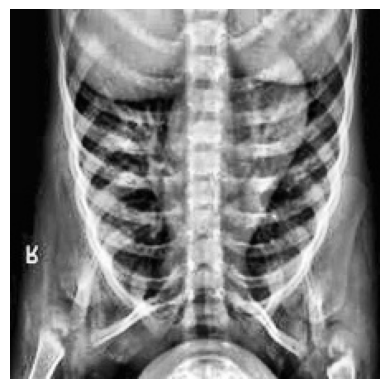

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
X-ray Image Prediction: Non-COVID-19 (Probability: 0.46)
Processing CT scan image: Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z117.png


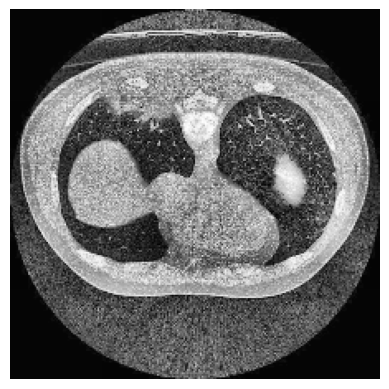

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
CT Scan Image Prediction: COVID-19 (Probability: 1.00)


In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Function to create and compile the model architecture
def create_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    return model

# Function to load and preprocess a single image
def preprocess_single_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {file_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify a single image using a given model
def classify_image(model, image_path, img_size=(150, 150), threshold=0.5):
    image = preprocess_single_image(image_path, img_size)
    prediction = model.predict(image)[0][0]
    if prediction > threshold:
        return "COVID-19", prediction
    else:
        return "Non-COVID-19", prediction

# Save the X-ray and CT scan models using the native Keras format
def save_models():
    xray_model = create_cnn_model()
    ct_model = create_cnn_model()

    # Dummy training code to initialize weights (Replace this with actual training)
    # Example:
    # xray_model.fit(xray_train_data, xray_train_labels, epochs=1)
    # ct_model.fit(ct_train_data, ct_train_labels, epochs=1)

    # Save the models
    xray_model.save('xray_model.keras')
    ct_model.save('ct_model.keras')

# Load the trained models from the native Keras format
def load_models():
    xray_model = load_model('xray_model.keras')
    ct_model = load_model('ct_model.keras')
    return xray_model, ct_model

# Function to display an image
def display_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def main():
    # Save models (typically done only once, not in the main function)
    # Uncomment the following line if you need to save models again
    # save_models()

    # Load the trained models
    xray_model, ct_model = load_models()

    # Paths to the test images
    xray_image_path = 'Dataset/X-Ray Test/Non-COVID/Non-COVID-19 (542).jpg'  # Replace with the path to your X-ray image
    ct_image_path = 'Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z117.png'  # Replace with the path to your CT scan image

    # Display and predict X-ray image
    print(f"Processing X-ray image: {xray_image_path}")
    display_image(xray_image_path)
    xray_classification, xray_prediction = classify_image(xray_model, xray_image_path)
    print(f'X-ray Image Prediction: {xray_classification} (Probability: {xray_prediction:.2f})')

    # Display and predict CT scan image
    print(f"Processing CT scan image: {ct_image_path}")
    display_image(ct_image_path)
    ct_classification, ct_prediction = classify_image(ct_model, ct_image_path)
    print(f'CT Scan Image Prediction: {ct_classification} (Probability: {ct_prediction:.2f})')

if __name__ == '__main__':
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
X-ray Image Prediction: Non-COVID-19 (Probability: 0.08)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
CT Scan Image Prediction: COVID-19 (Probability: 1.00)


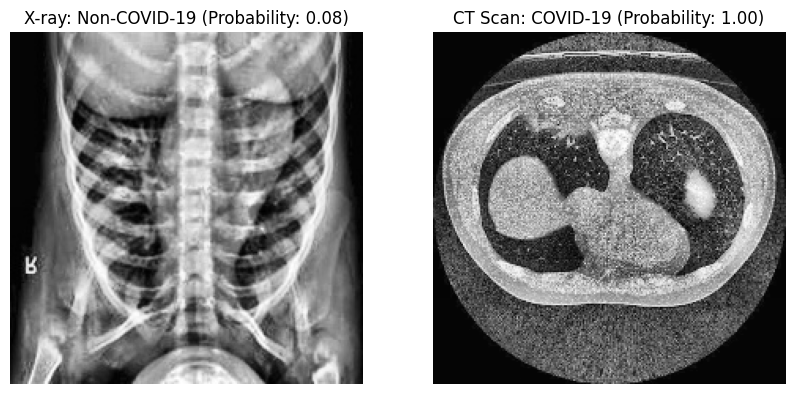

CT scan model has higher confidence in detecting COVID-19.


In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Function to create and compile the model architecture
def create_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    return model

# Function to load and preprocess a single image
def preprocess_single_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {file_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify a single image using a given model
def classify_image(model, image_path, img_size=(150, 150), threshold=0.5):
    image = preprocess_single_image(image_path, img_size)
    prediction = model.predict(image)[0][0]
    if prediction > threshold:
        return "COVID-19", prediction
    else:
        return "Non-COVID-19", prediction

# Save the X-ray and CT scan models using the native Keras format
def save_models():
    xray_model = create_cnn_model()
    ct_model = create_cnn_model()

    # Dummy training code to initialize weights (Replace this with actual training)
    # Example:
    # xray_model.fit(xray_train_data, xray_train_labels, epochs=1)
    # ct_model.fit(ct_train_data, ct_train_labels, epochs=1)

    # Save the models
    xray_model.save('xray_model.keras')
    ct_model.save('ct_model.keras')

# Load the trained models from the native Keras format
def load_models():
    xray_model = load_model('xray_model.keras')
    ct_model = load_model('ct_model.keras')
    return xray_model, ct_model

# Function to display images side by side
def display_images_side_by_side(image_paths, titles):
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
    
    plt.figure(figsize=(10, 5))
    
    for i, img in enumerate(images):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')  # Hide axes
    
    plt.show()

def main():
    # Save models (typically done only once, not in the main function)
    # Uncomment the following line if you need to save models again
    # save_models()

    # Load the trained models
    xray_model, ct_model = load_models()

    # Paths to the test images
    xray_image_path = 'Dataset/X-Ray Test/Non-COVID/Non-COVID-19 (542).jpg'  # Replace with the path to your X-ray image
    ct_image_path = 'Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z117.png'  # Replace with the path to your CT scan image

    # Predict and classify X-ray image
    xray_classification, xray_prediction = classify_image(xray_model, xray_image_path)
    print(f'X-ray Image Prediction: {xray_classification} (Probability: {xray_prediction:.2f})')

    # Predict and classify CT scan image
    ct_classification, ct_prediction = classify_image(ct_model, ct_image_path)
    print(f'CT Scan Image Prediction: {ct_classification} (Probability: {ct_prediction:.2f})')

    # Display the images and their predictions
    display_images_side_by_side(
        [xray_image_path, ct_image_path],
        [f'X-ray: {xray_classification} (Probability: {xray_prediction:.2f})',
         f'CT Scan: {ct_classification} (Probability: {ct_prediction:.2f})']
    )
    
    # Compare predictions
    if xray_prediction > ct_prediction:
        print("X-ray model has higher confidence in detecting COVID-19.")
    elif ct_prediction > xray_prediction:
        print("CT scan model has higher confidence in detecting COVID-19.")
    else:
        print("Both models have similar confidence in detecting COVID-19.")

if __name__ == '__main__':
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
X-ray Image Prediction: COVID-19 (Probability: 0.70)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
CT Scan Image Prediction: COVID-19 (Probability: 1.00)


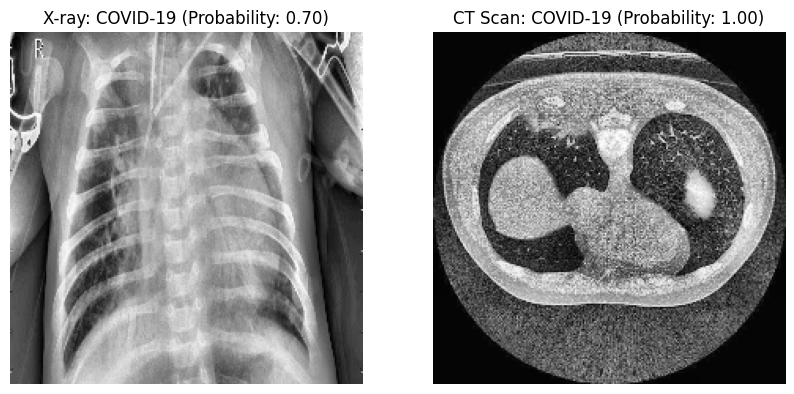

CT scan model has higher confidence in detecting COVID-19.


In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Function to create and compile the model architecture
def create_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    return model

# Function to load and preprocess a single image
def preprocess_single_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {file_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify a single image using a given model
def classify_image(model, image_path, img_size=(150, 150), threshold=0.5):
    image = preprocess_single_image(image_path, img_size)
    prediction = model.predict(image)[0][0]
    if prediction > threshold:
        return "COVID-19", prediction
    else:
        return "Non-COVID-19", prediction

# Save the X-ray and CT scan models using the native Keras format
def save_models():
    xray_model = create_cnn_model()
    ct_model = create_cnn_model()

    # Dummy training code to initialize weights (Replace this with actual training)
    # Example:
    # xray_model.fit(xray_train_data, xray_train_labels, epochs=1)
    # ct_model.fit(ct_train_data, ct_train_labels, epochs=1)

    # Save the models
    xray_model.save('xray_model.keras')
    ct_model.save('ct_model.keras')

# Load the trained models from the native Keras format
def load_models():
    xray_model = load_model('xray_model.keras')
    ct_model = load_model('ct_model.keras')
    return xray_model, ct_model

# Function to display images side by side
def display_images_side_by_side(image_paths, titles):
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
    
    plt.figure(figsize=(10, 5))
    
    for i, img in enumerate(images):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')  # Hide axes
    
    plt.show()

def main():
    # Save models (typically done only once, not in the main function)
    # Uncomment the following line if you need to save models again
    # save_models()

    # Load the trained models
    xray_model, ct_model = load_models()

    # Paths to the test images
    xray_image_path = 'Dataset/X-Ray Test/COVID/person1_virus_7.jpeg'  # Replace with the path to your X-ray image
    ct_image_path = 'Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z117.png'  # Replace with the path to your CT scan image

    # Predict and classify X-ray image
    xray_classification, xray_prediction = classify_image(xray_model, xray_image_path)
    print(f'X-ray Image Prediction: {xray_classification} (Probability: {xray_prediction:.2f})')

    # Predict and classify CT scan image
    ct_classification, ct_prediction = classify_image(ct_model, ct_image_path)
    print(f'CT Scan Image Prediction: {ct_classification} (Probability: {ct_prediction:.2f})')

    # Display the images and their predictions
    display_images_side_by_side(
        [xray_image_path, ct_image_path],
        [f'X-ray: {xray_classification} (Probability: {xray_prediction:.2f})',
         f'CT Scan: {ct_classification} (Probability: {ct_prediction:.2f})']
    )
    
    # Compare predictions
    if xray_prediction > ct_prediction:
        print("X-ray model has higher confidence in detecting COVID-19.")
    elif ct_prediction > xray_prediction:
        print("CT scan model has higher confidence in detecting COVID-19.")
    else:
        print("Both models have similar confidence in detecting COVID-19.")

if __name__ == '__main__':
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
X-ray Image Classification: COVID-19 (Probability: 0.77)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
CT Scan Image Classification: COVID-19 (Probability: 1.00)


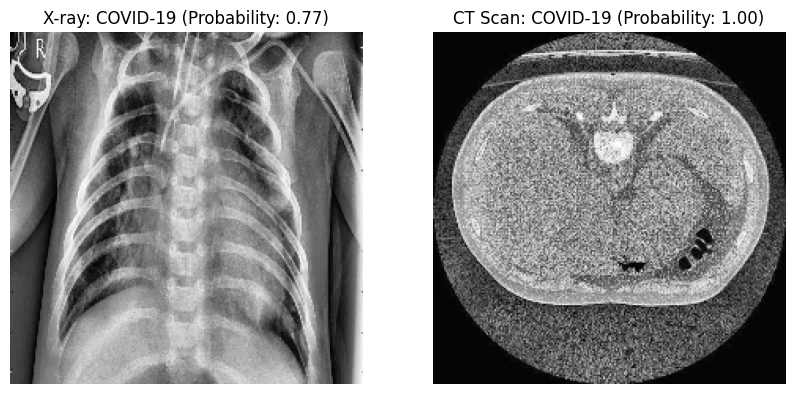

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Function to create and compile the model architecture
def create_cnn_model(input_shape=(150, 150, 3)):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'Precision', 'Recall']
    )
    return model

# Function to load and preprocess a single image
def preprocess_single_image(file_path, img_size=(150, 150)):
    img = cv2.imread(file_path)
    if img is None:
        raise ValueError(f"Image not found or cannot be loaded: {file_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify a single image using a given model
def classify_image(model, image_path, img_size=(150, 150), threshold=0.5):
    image = preprocess_single_image(image_path, img_size)
    prediction = model.predict(image)[0][0]
    classification = "COVID-19" if prediction > threshold else "Non-COVID-19"
    return classification, prediction

# Save the X-ray and CT scan models using the native Keras format
def save_models():
    xray_model = create_cnn_model()
    ct_model = create_cnn_model()

    # Dummy training code to initialize weights (Replace this with actual training)
    # Example:
    # xray_model.fit(xray_train_data, xray_train_labels, epochs=1)
    # ct_model.fit(ct_train_data, ct_train_labels, epochs=1)

    # Save the models
    xray_model.save('xray_model.keras')
    ct_model.save('ct_model.keras')

# Load the trained models from the native Keras format
def load_models():
    xray_model = load_model('xray_model.keras')
    ct_model = load_model('ct_model.keras')
    return xray_model, ct_model

# Function to display images side by side
def display_images_side_by_side(image_paths, titles):
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
    
    plt.figure(figsize=(10, 5))
    
    for i, img in enumerate(images):
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')  # Hide axes
    
    plt.show()

def main():
    # Load the trained models
    xray_model, ct_model = load_models()

    # Paths to the test images
    xray_image_path = 'Dataset/X-Ray Test/COVID/person1_virus_8.jpeg'  # Replace with the path to your X-ray image
    ct_image_path = 'Dataset/CT-Scan Test/COVID/radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm_z033.png'  # Replace with the path to your CT scan image

    # Predict and classify X-ray image
    xray_classification, xray_prediction = classify_image(xray_model, xray_image_path)
    print(f'X-ray Image Classification: {xray_classification} (Probability: {xray_prediction:.2f})')

    # Predict and classify CT scan image
    ct_classification, ct_prediction = classify_image(ct_model, ct_image_path)
    print(f'CT Scan Image Classification: {ct_classification} (Probability: {ct_prediction:.2f})')

    # Display the images with their predictions
    display_images_side_by_side(
        [xray_image_path, ct_image_path],
        [f'X-ray: {xray_classification} (Probability: {xray_prediction:.2f})',
         f'CT Scan: {ct_classification} (Probability: {ct_prediction:.2f})']
    )
    
if __name__ == '__main__':
    main()
